# Содержание #



* 1 Изучение файла
* 2 Разбитие данных на выборки
* 3 Исследование модели
    * Промежуточные выводы
* 4 Проверка лучшей модели на тестовой выборке
* 5 Проверка лучшей модели на адекватность
* Вывод


<div style="border:2px solid Black; padding:20px;">
<h1> Рекомендации тарифов</h1>
В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — она уже выполнена.

Построим модель с максимально большим значением *accuracy*.  
</div>


## Откройте и изучите файл

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None
   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246  

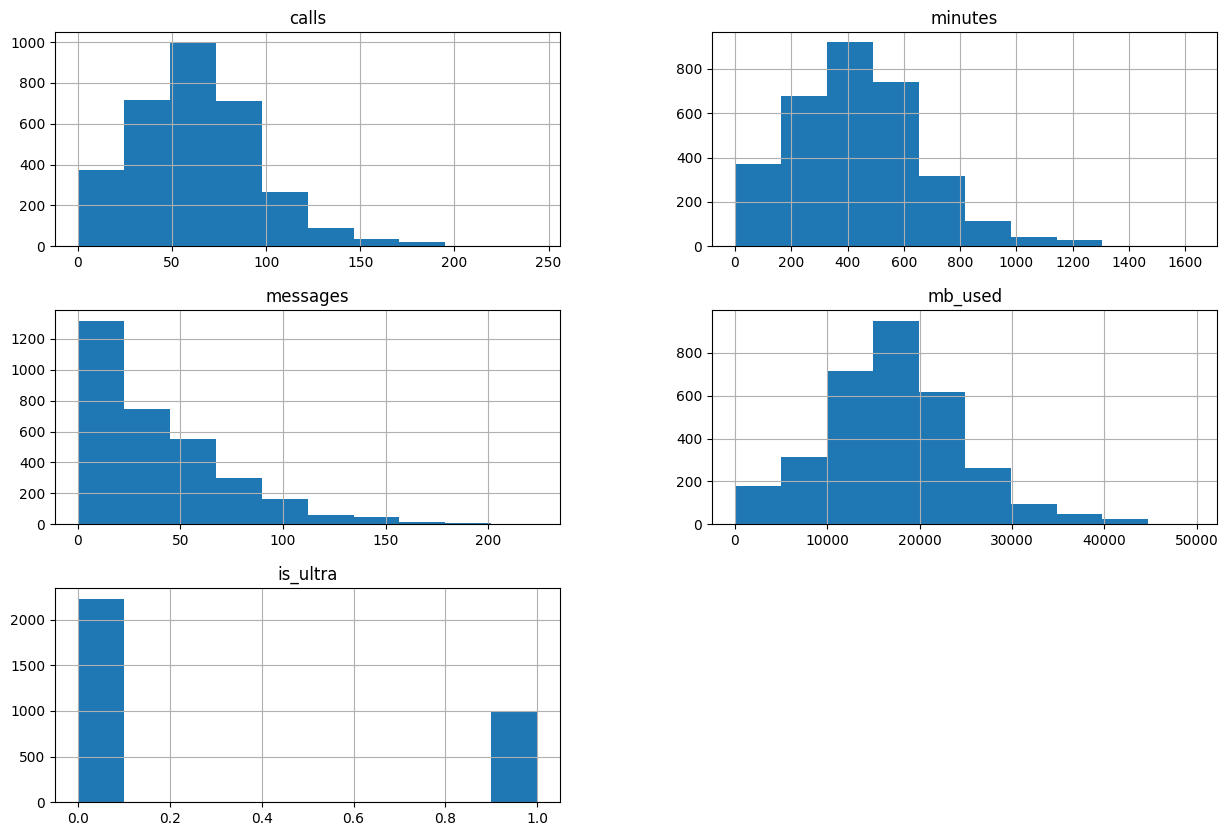

In [ ]:
df = pd.read_csv('datasets/users_behavior.csv')

print(df.info());

print(df.head());

print(df.describe());

print(df.value_counts());

print(df.duplicated());

df.hist(figsize=(15,10));

## Разобъём данные на выборки

Разбиваем данные на 3 части в пропорциях 3:1:1

Обучающая выборка - 60%, Валидационная выборка - 20%, Тестовая выборка - 20%

In [ ]:
df_train, df_test_plus_valid = train_test_split(df, test_size=0.4, random_state=12345)
df_test, df_valid = train_test_split(df_test_plus_valid, test_size=0.5, random_state=12345)
print(df_train)
print(df_test)
print(df_valid)

      calls  minutes  messages   mb_used  is_ultra
3027   60.0   431.56      26.0  14751.26         0
434    33.0   265.17      59.0  17398.02         0
1226   52.0   341.83      68.0  15462.38         0
1054   42.0   226.18      21.0  13243.48         0
1842   30.0   198.42       0.0   8189.53         0
...     ...      ...       ...       ...       ...
2817   12.0    86.62      22.0  36628.85         1
546    65.0   458.46       0.0  15214.25         1
382   144.0   906.18       0.0  25002.44         1
2177   38.0   301.27      37.0  28914.24         1
482   160.0  1084.05      95.0  36843.92         1

[1928 rows x 5 columns]
      calls  minutes  messages   mb_used  is_ultra
1386   92.0   536.96      18.0  20193.90         0
3124   40.0   286.57      17.0  17918.75         0
1956   81.0   531.22      56.0  17755.06         0
2286   67.0   460.76      27.0  16626.26         0
3077   22.0   120.09      16.0   9039.57         0
...     ...      ...       ...       ...       ...
1999  

In [ ]:
train, valid, test = np.split(df.sample(frac=1, random_state=12345),
                              [int(.6*len(df)), int(.8*len(df))])
print(train)
print(valid)
print(test)

      calls  minutes  messages   mb_used  is_ultra
1415   82.0   507.89      88.0  17543.37         1
916    50.0   375.91      35.0  12388.40         0
1670   83.0   540.49      41.0   9127.74         0
686    79.0   562.99      19.0  25508.19         1
2951   78.0   531.29      20.0   9217.25         0
...     ...      ...       ...       ...       ...
2104  118.0   844.52      64.0  19459.08         1
2442   93.0   639.07      29.0  26770.62         1
1265   66.0   437.75      22.0  25108.55         0
1635   68.0   464.62       6.0   5810.80         0
848    61.0   398.63      76.0  12230.87         0

[1928 rows x 5 columns]
      calls  minutes  messages   mb_used  is_ultra
3116   83.0   509.32      69.0  19355.79         0
3018   49.0   302.43      38.0  20974.22         0
2443   91.0   549.56      41.0  26788.18         1
757    81.0   531.28     109.0  19496.93         1
752    79.0   577.11      46.0  30981.68         0
...     ...      ...       ...       ...       ...
824   

## Исследуем модели

In [ ]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

# Модель дерево решений

# < сделаем цикл для max_depth от 1 до 20 >
for depth in range(1,21):
    model =DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)

    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))


max_depth = 1 : 0.7356143079315708
max_depth = 2 : 0.7744945567651633
max_depth = 3 : 0.7791601866251944
max_depth = 4 : 0.7744945567651633
max_depth = 5 : 0.7838258164852255
max_depth = 6 : 0.776049766718507
max_depth = 7 : 0.7993779160186625
max_depth = 8 : 0.7931570762052877
max_depth = 9 : 0.7807153965785381
max_depth = 10 : 0.7884914463452566
max_depth = 11 : 0.7744945567651633
max_depth = 12 : 0.7807153965785381
max_depth = 13 : 0.7713841368584758
max_depth = 14 : 0.76049766718507
max_depth = 15 : 0.7713841368584758
max_depth = 16 : 0.749611197511664
max_depth = 17 : 0.7480559875583204
max_depth = 18 : 0.749611197511664
max_depth = 19 : 0.7433903576982893
max_depth = 20 : 0.7325038880248833


- В данном примере видно как  модель "дерево решений2 переобучилась, после глубины дерева - 7 точность начнает падать.

In [ ]:
# Модель случайного леса

#Рассчитаем точность для модели состоящей из 5 деревьев:
best_model = None
best_result = 0
for est in range(1, 6):
    model = RandomForestClassifier(random_state=12345, n_estimators= est) # обучите модель с заданным количеством деревьев
    model.fit(features_train,target_train) # обучите модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_model = model
        best_result = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
#    print('количество деревьев:', est, 'Accuracy:', result)

print("Accuracy наилучшей модели на валидационной выборке:", best_result)

#Рассчитаем точность для модели состоящей из 10 деревьев:
best_model = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators= est) # обучите модель с заданным количеством деревьев
    model.fit(features_train,target_train) # обучите модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_model = model
        best_result = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
    print('количество деревьев:', est, 'Accuracy:', result)

print("Accuracy наилучшей модели на валидационной выборке:", best_result)

#Рассчитаем точность для модели состоящей из 100 деревьев:
best_model = None
best_result = 0
for est in range(1, 101):
    model = RandomForestClassifier(random_state=12345, n_estimators= est) # обучите модель с заданным количеством деревьев
    model.fit(features_train,target_train) # обучите модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_model = model
        best_result = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
    print('количество деревьев:', est, 'Accuracy:', result)

print("Accuracy наилучшей модели на валидационной выборке:", best_result)


Accuracy наилучшей модели на валидационной выборке: 0.7729393468118196
количество деревьев: 1 Accuracy: 0.7402799377916018
количество деревьев: 2 Accuracy: 0.7589424572317263
количество деревьев: 3 Accuracy: 0.7573872472783826
количество деревьев: 4 Accuracy: 0.7729393468118196
количество деревьев: 5 Accuracy: 0.7667185069984448
количество деревьев: 6 Accuracy: 0.7791601866251944
количество деревьев: 7 Accuracy: 0.7807153965785381
количество деревьев: 8 Accuracy: 0.7869362363919129
количество деревьев: 9 Accuracy: 0.7838258164852255
количество деревьев: 10 Accuracy: 0.7807153965785381
Accuracy наилучшей модели на валидационной выборке: 0.7869362363919129
количество деревьев: 1 Accuracy: 0.7402799377916018
количество деревьев: 2 Accuracy: 0.7589424572317263
количество деревьев: 3 Accuracy: 0.7573872472783826
количество деревьев: 4 Accuracy: 0.7729393468118196
количество деревьев: 5 Accuracy: 0.7667185069984448
количество деревьев: 6 Accuracy: 0.7791601866251944
количество деревьев: 7 Ac

- В данном примере видно как данная модель не переобучается с увеличением деревьев, точность растет с кол-вом деревьев, но при этом модель становиться более тяжелой.

In [ ]:
# Модель логистической регрессии
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=100)
model.fit(features_train,target_train) # обучите модель на тренировочной выборке
result = model.score(features_valid, target_valid) # посчитайте качество модели на валидационной
result

0.6842923794712286

### Краткие промежуточные выводы:
На даннос этапе обучили следующие модели:
- дерево решений,
- случайный лес,
- логистическую регрессию.

У каждой — свои достоинства и недостатки. После оценки моделей можно сделать сделать следующие выводы по качеству (accuracy) и скорости работы каждой:

1. Качество (accuracy). Это самый важный критерий для бизнеса: чем выше качество, тем больше прибыли приносит продукт.
Самое высокое качество у случайного леса: вместо одного решающего дерева используется целый ансамбль.
На втором месте — у дерева решений. Если глубина меньше семи, оно недообучается, когда больше — переобучается. Самое низкое качество предсказания у логистической регрессия. Модель несложная, а значит, переобучение ей не грозит.


2. Скорость работы. Не менее значимый критерий: если сервис работает медленно, оттока пользователей не избежать.
Высокая скорость работы у логистической регрессии: у неё меньше всего параметров.
Скорость решающего дерева тоже высокая и зависит от глубины. Помните, в экспериментах наилучшее качество модели получилось при глубине, равной 7. Ответ на вопрос модель получила всего-то за семь проверок значений признаков — а это очень быстро!
Случайный лес медленнее всех: чем больше деревьев, тем неторопливее работает модель.

## Проверьте модель на тестовой выборке

In [ ]:
#Рассчитаем точность для модели состоящей из 100 деревьев на тестовой выборке:
best_model = None
best_result = 0
for est in range(1, 101):
    model = RandomForestClassifier(random_state=12345, n_estimators= est) # обучите модель с заданным количеством деревьев
    model.fit(features_train,target_train) # обучите модель на тренировочной выборке
    result = model.score(features_test, target_test) # посчитайте качество модели на валидационной выборке
    if result > best_result:
        best_model = model
        best_result = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
    print('количество деревьев:', est, 'Accuracy:', result)

print("Accuracy наилучшей модели на тестовой выборке:", best_result)

количество деревьев: 1 Accuracy: 0.7107309486780715
количество деревьев: 2 Accuracy: 0.7636080870917574
количество деревьев: 3 Accuracy: 0.7387247278382582
количество деревьев: 4 Accuracy: 0.7713841368584758
количество деревьев: 5 Accuracy: 0.749611197511664
количество деревьев: 6 Accuracy: 0.7807153965785381
количество деревьев: 7 Accuracy: 0.7682737169517885
количество деревьев: 8 Accuracy: 0.7822706065318819
количество деревьев: 9 Accuracy: 0.7729393468118196
количество деревьев: 10 Accuracy: 0.7853810264385692
количество деревьев: 11 Accuracy: 0.7838258164852255
количество деревьев: 12 Accuracy: 0.7869362363919129
количество деревьев: 13 Accuracy: 0.7822706065318819
количество деревьев: 14 Accuracy: 0.7838258164852255
количество деревьев: 15 Accuracy: 0.7838258164852255
количество деревьев: 16 Accuracy: 0.7869362363919129
количество деревьев: 17 Accuracy: 0.7869362363919129
количество деревьев: 18 Accuracy: 0.7931570762052877
количество деревьев: 19 Accuracy: 0.7884914463452566
кол

- "Accuracy" наилучшей модели на тестовой выборке немного ниже "Accuracy" наилучшей модели на валидационной выборке, но при этом достаточно высокое выше 0,75.

## Проверим модели на адекватность

In [ ]:
relation= ((df['is_ultra'].loc[df['is_ultra'] == 0].count())/
(df['is_ultra'].count()))

print('%.5f'%relation)


0.69353


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)

dummy_clf.fit(df['is_ultra'], df['is_ultra'])

dummy_clf.score(df['is_ultra'], df['is_ultra'])




0.693528313627878

- Можно сделать вывод, что модель адекватная т.к.самый часто встречающийся класс "занимает" 69% (2229 / 3214 == 0.693528313627878). Это контрольные данные для сравнительной оценки, построенной нами "лучшей" модели. Наша лучшая модель превышает этот скор.

<div style="border:2px solid Black; padding:20px;">
<h1> Вывод </h1>
- В нашем распоряжении были данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»).

- В проекте были построины модели для задачи классификации, которые выберут подходящий тариф. Предобработка уже сделана.

- Была построена модель с максимально большим значением *accuracy* доля правильных ответов превышает 0.75.

- В данном примере видно как  модель "дерево решений2 переобучилась, после глубины дерева - 7 точность начнает падать.

- Accuracy наилучшей модели "Случайный лес" состоящей из 100 деревьев на валидационной выборке: 0.7962674961119751

- "Accuracy" наилучшей модели состоящей из 100 деревьев  на тестовой выборке : 0.7947122861586314 (немного ниже "Accuracy" наилучшей модели на валидационной выборке, но при этом достаточно высокое выше 0,75).

- Можно сделать вывод, что модель адекватная т.к.самый часто встречающийся класс "занимает" 69% (2229 / 3214 == 0.693528313627878). Это контрольные данные для сравнительной оценки, построенной нами "лучшей" модели. Наша лучшая модель превышает этот скор.
</div>